## Lending Club Default Rate Prediction -- Chunming Liu 

## Summary


###  Lending Club is a Peer-to-Peer lending company that utilizes a group of private investors to fund loan requests. The goal of this project is to create model and predict default rate by new borrowers that would likely default on their loans.

### Lending club provide historical data which is available in Kaggle.com and contains over 130,000 records. Deep data understanding, data exploration and feature engineering are implmented to identify variables which have a direct or indirect response to a borrower's poetential to default.  There are total 151 features in the original data, and the dominant features (< 50 percentage) have been identified through PCA process.

### Multiple major models including logistic regression, SVM, Decision trees, Neural Network, and KNN have been applied on the lending club cleaned and filtered data. Through ROC/AUC metrics, it has been identified that the gradient boosting trees and random forest models have the best performance in the prediction accuracy, compared to linear SVM and KNN models which have the worst performance.


## Package and Data loading
#### including lending club source data and dictionary data

In [178]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
% matplotlib inline

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Set detailed parameters to support customized columns, column width, and figure size.
pd.set_option('max_columns', 200)
pd.set_option('max_colwidth', 5000)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (9,5)

In [57]:
# load data with initial evaluations
df = pd.read_csv('./LoanStats_securev1_2016Q1.csv', skiprows=1, low_memory=False)
dic = pd.read_excel('LCDataDictionary.xlsx',sheetname='Updated original dictionary')  # Loading in the data dictionary

In [58]:
# backup source data
dataT = df
dataD = dic

## Initial data understanding

In this section, I did initial data check and evaluations which include checking data status statistics of numerical data, distributions of multiple features which logically important to loan_status, correlations and related visulazation results.

It has been found:
 * There are total 151 features existing in the origial dtaa
 * Both numerical and categorical data exists
 * There are many column contains NA values, which need cleaning or replacement in data exploration
 * It is identified that there are dominant factors in loan grade and interest rate distribution

In [59]:
# have a peek on original data
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,76003542,NaN,16000.0,16000.0,16000.0,36 months,5.32%,481.84,A,A1,Security specialist,8 years,RENT,105000.0,Not Verified,Mar-16,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=76003542,NaN,debt_consolidation,Debt consolidation,206xx,MD,15.02,1.0,Nov-00,720.0,724.0,0.0,9.0,NaN,9.0,0.0,6219.0,27.90%,21.0,w,0.00,0.00,16098.34000,16098.34,16000.00,98.34,0.00,0.0,0.0,May-16,16107.80,NaN,Nov-16,679.0,675.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,23525.0,0.0,3.0,2.0,2.0,8.0,17306.0,69.0,0.0,1.0,3770.0,50.0,22300.0,1.0,3.0,1.0,3.0,3361.0,13632.0,29.7,0.0,0.0,124.0,184.0,22.0,8.0,0.0,52.0,NaN,8.0,9.0,0.0,2.0,3.0,2.0,5.0,7.0,6.0,14.0,3.0,9.0,0.0,0.0,0.0,2.0,95.2,0.0,0.0,0.0,47543.0,23525.0,19400.0,25243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,76023477,NaN,17000.0,17000.0,17000.0,36 months,9.75%,546.55,B,B3,Kindergarten Teacher,< 1 year,MORTGAGE,40000.0,Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=76023477,NaN,credit_card,Credit card refinancing,440xx,NC,24.30,0.0,Aug-06,705.0,709.0,0.0,NaN,NaN,4.0,0.0,14009.0,85.90%,8.0,w,1856.98,1856.98,16630.58000,16630.58,15143.02,1487.56,0.00,0.0,0.0,Nov-17,546.55,Dec-17,Nov-17,799.0,795.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,31939.0,0.0,1.0,0.0,0.0,25.0,17930.0,64.0,0.0,0.0,4913.0,72.0,16300.0,1.0,0.0,1.0,0.0,7985.0,2291.0,85.9,0.0,0.0,25.0,115.0,35.0,25.0,0.0,35.0,NaN,6.0,NaN,0.0,3.0,3.0,3.0,5.0,1.0,3.0,7.0,3.0,4.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0

In [60]:
# A peek on original dictionary data
dic.head(10)

,LoanStatNew,Description,Unnamed: 2,LoanStatNew.1
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.,NaN,acc_now_delinq
1,acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN
2,addr_state,The state provided by the borrower in the loan application,NaN,addr_state
3,all_util,Balance to credit limit on all trades,NaN,all_util
4,annual_inc,The self-reported annual income provided by the borrower during registration.,NaN,annual_inc
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration,NaN,annual_inc_joint
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers,NaN,application_type
7,avg_cur_bal,Average current balance of all accounts,NaN,collection_recovery_fee
8,bc_open_to_buy,Total open to buy on revolving bankcards.,NaN,collections_12_mths_ex_med
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.,NaN,delinq_2yrs


In [61]:
# Get data and dictionary dimension
df.shape, dic.shape

((133891, 151), (156, 4))

In [62]:
# check dictionary tail since it is different form data row number
# it need removed from row 151 to 155 
dic.tail(10)

,LoanStatNew,Description,Unnamed: 2,LoanStatNew.1
146,settlement_status,"The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT",NaN,NaN
147,settlement_date,The date that the borrower agrees to the settlement plan,NaN,NaN
148,settlement_amount,The loan amount that the borrower has agreed to settle for,NaN,NaN
149,settlement_percentage,The settlement amount as a percentage of the payoff balance amount on the loan,NaN,NaN
150,settlement_term,The number of months that the borrower will be on the settlement plan,NaN,NaN
151,NaN,NaN,NaN,NaN
152,NaN,* Employer Title replaces Employer Name for all loans listed after 9/23/2013,NaN,NaN
153,Help page about datafiles by Lendingclub,https://help.lendingclub.com/hc/en-us/articles/115004323368-Recent-and-upcoming-changes-to-the-downloadable-data-files-and-API-services,NaN,NaN
154,what is hardship? Temporarily pay interest only.,https://debanked.com/2017/04/lending-club-to-beta-hardship-plans-for-borrowers-and-protect-returns-for-investors/,NaN,NaN
155,Debt settlement is the process of paying off debt to a creditor after mutually agreeing to a sum less than what is owed. This hurts credic score.,NaN,NaN,NaN


In [63]:
# Check df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133891 entries, 0 to 133890
Columns: 151 entries, id to settlement_term
dtypes: float64(112), object(39)
memory usage: 154.2+ MB


In [64]:
# check data types, both numerical and categorical data exists
df.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [65]:
# check numerical columns statitics
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,133887.000000,133887.000000,133887.000000,133887.000000,1.338870e+05,133870.000000,133887.000000,133887.000000,133887.000000,133886.000000,69322.000000,23671.000000,133887.000000,133887.000000,1.338870e+05,133887.000000,133887.000000,133887.000000,133887.000000,133887.000000,133887.000000,133887.000000,1.338870e+05,133887.000000,133887.000000,133887.000000,133887.000000,133887.000000,133887.000000,38074.000000,133887.0,2661.000000,2659.000000,133887.000000,133887.000000,1.338870e+05,133825.000000,133826.000000,133826.000000,133826.000000,130186.000000,133826.000000,116008.000000,133826.000000,133826.000000,133826.000000,133820.000000,1.338870e+05,133826.000000,133825.000000,133825.000000,133887.000000,133887.000000,132776.000000,132712.000000,133887.000000,133887.000000,130241.000000,133887.000000,133887.000000,133887.000000,133887.000000,132843.000000,33756.000000,120089.000000,47783.000000,133887.000000,133887.000000,133887.000000,133887.000000,133887.00000,133887.000000,133887.000000,133887.000000,133887.000000,133887.000000,126266.000000,133887.000000,133887.000000,133887.000000,133887.000000,132758.000000,133887.000000,133887.000000,1.338870e+05,1.338870e+05,1.338870e+05,1.338870e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,774.0,774.000000,774.0,774.000000,635.000000,774.000000,774.000000,1087.000000,1087.000000,1087.000000
mean,NaN,15589.394041,15589.394041,15581.984023,460.863923,8.046397e+04,19.547033,0.343476,695.750633,699.750827,0.576498,33.807810,66.361413,12.119922,0.238709,1.861627e+04,25.343245,5695.480540,5692.970475,10951.511813,10946.224173,8583.266797,2292.920647,1.102888e+00,74.221479,13.246068,3186.572260,687.161039,676.487710,0.021257,45.218154,1.0,108617.690135,18.603103,0.006969,259.246596,1.472398e+05,1.045373,2.797147,0.747157,1.625215,21.641175,35704.147819,70.741044,1.373769,2.930006,6183.582271,60.654499,3.636171e+04,0.952924,1.544121,2.187215,4.799159,13509.653738,10857.383932,59.762205,0.010120,21.343491,127.552652,188.682553,13.155243,7.799757,1.671402,23.845607,38.836799,6.812589,35.217672,0.518908,3.809533,5.917796,4.955836,8.00

In [66]:
# Check NA number in each column
df.isnull().sum()

id                                                 2
member_id                                     133891
loan_amnt                                          4
funded_amnt                                        4
funded_amnt_inv                                    4
term                                               4
int_rate                                           4
installment                                        4
grade                                              4
sub_grade                                          4
emp_title                                       8985
emp_length                                         4
home_ownership                                     4
annual_inc                                         4
verification_status                                4
issue_d                                            4
loan_status                                        4
pymnt_plan                                         4
url                                           

### Distribution of key features
Several key features are selected from the data frame: loan_status, loan grade, int_rate, and loan_amnt (loan amount)

#### Loan Status distribution
It is shown that the total "Charged off" loan is about 36.5% of total "Fully Paid" loan. This means a pretty bad default rate and high risk for loaner 

In [67]:
# check loan_status names and distributions
df['loan_status'].value_counts()

Current               79931
Fully Paid            35650
Charged Off           13043
Late (31-120 days)     3157
In Grace Period        1637
Late (16-30 days)       458
Default                  11
Name: loan_status, dtype: int64

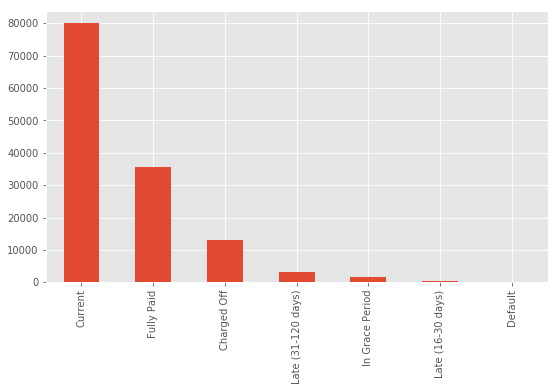

In [68]:
loan_status = df['loan_status'].value_counts()
plt.figure();
loan_status.plot.bar()

#### Loan Grade distribution
The loan grade distribution shows that majority loan is grade B, then grade C, and the third one is Grade A

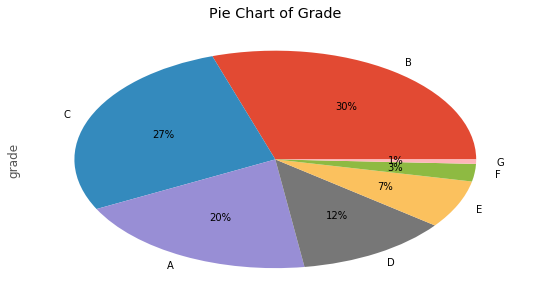

In [69]:
# Check distribution of loan grade.
df['grade'].value_counts().plot.pie(autopct='%1.0f%%',)
plt.title('Pie Chart of Grade')

#### Funded Amount based on grade

It is interesting to find that the lower loan grade, the higher average loan amount.

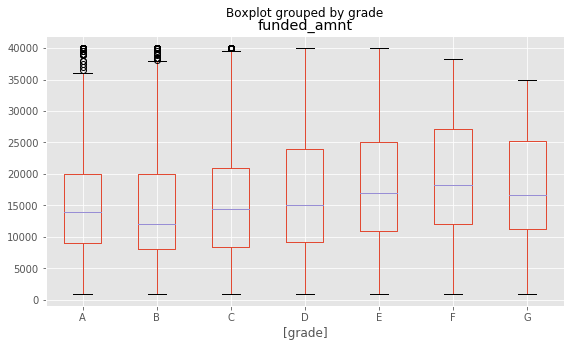

In [70]:
# check int_rate box plot based on grade
df[['funded_amnt','grade']].boxplot(by='grade')

In [71]:
# employment length is important feature which may relate to income, credit, and etc
# It looks that long length(10+ year) and little length(<1, 2,3) are majority borrower
df['emp_length'].value_counts()

10+ years    46347
2 years      11849
3 years      10735
< 1 year     10082
n/a           8944
1 year        8703
5 years       8062
4 years       7789
8 years       6330
6 years       5379
9 years       5202
7 years       4465
Name: emp_length, dtype: int64

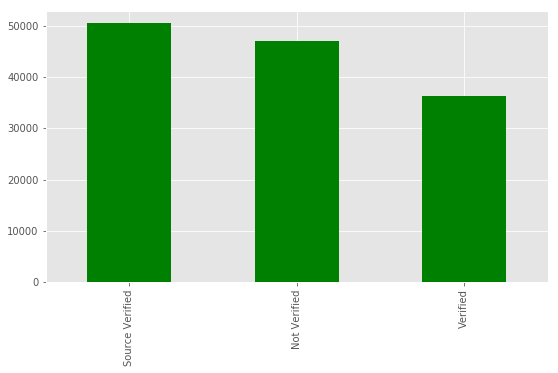

In [72]:
# verification status shows significant account are not verified, which impose risk on the loan
verif_stat = df['verification_status'].value_counts()
plt.figure();
verif_stat.plot.bar(color='green')

In [73]:
df['purpose'].value_counts()

debt_consolidation    76687
credit_card           32187
home_improvement       8662
other                  7132
major_purchase         2923
medical                1457
small_business         1393
car                    1306
moving                  769
vacation                743
house                   545
renewable_energy         83
Name: purpose, dtype: int64

In [74]:
# Convert int_rate into float
df['int_rate'] = pd.Series(df['int_rate']).str.replace('%', '').astype(float)

In [75]:
rate = df['int_rate'].values

(array([  5.32,   6.  ,   6.24,   6.49,   6.89,   6.97,   6.99,   7.26,
          7.39,   7.49,   7.89,   7.91,   8.38,   8.39,   8.49,   9.16,
          9.17,   9.75,   9.76,   9.8 ,  10.64,  10.75,  10.78,  11.22,
         11.47,  11.48,  11.99,  12.59,  12.88,  12.99,  13.18,  13.19,
         13.44,  13.67,  13.99,  14.46,  14.48,  14.77,  14.85,  15.29,
         15.31,  15.41,  15.59,  15.77,  16.29,  16.55,  16.59,  16.99,
         17.27,  17.57,  17.86,  17.97,  18.2 ,  18.25,  18.49,  18.99,
         19.48,  19.53,  19.89,  19.99,  20.5 ,  20.75,  20.99,  21.18,
         21.48,  21.97,  21.99,  22.45,  22.99,  23.13,  23.99,  24.11,
         24.24,  24.99,  25.09,  25.88,  25.99,  26.06,  26.57,  26.77,
         26.99,  27.31,  27.34,  27.49,  27.99,  28.14,  28.34,  28.49,
         28.67,  28.99,    nan,    nan,    nan,    nan]),
 <matplotlib.axes._subplots.AxesSubplot at 0x25014802f28>)

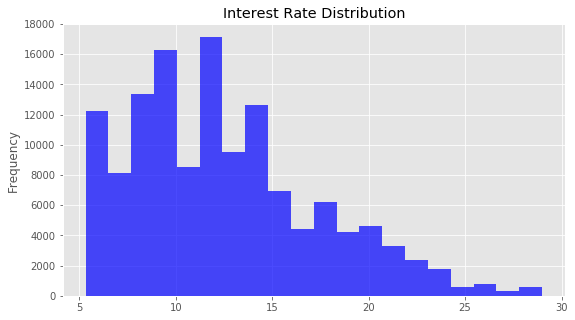

In [76]:
np.unique(rate), pd.Series(rate).plot(kind='hist',alpha=.7, bins=20, color='blue', title='Interest Rate Distribution')

## Data Exploration

### Part I: build a more efficient dictionary
There is a dictionary from LC which give descriptions on each columns in source data. However it is not convenient to understand data type and initial values， which cause difficulty in data exploration. So I update the dictionary table by adding related column data type and first row value.

In [79]:
# rename columns in dictionary
dic = dic.rename(columns={'LoanStatNew': 'name',
                          'Description': 'description'})
dic.head(4)

,name,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades


In [80]:
# drop columns which are redundant
dic = dic.drop(['Unnamed: 2', 'LoanStatNew.1'], 1)

ValueError: labels ['Unnamed: 2' 'LoanStatNew.1'] not contained in axis

In [81]:
# recording df data types and first row value into a data frame
df_dtypes = pd.DataFrame(df.dtypes,columns=['dtypes'])
df_dtypes = df_dtypes.reset_index()
df_dtypes
df_dtypes['name'] = df_dtypes['index']
df_dtypes = df_dtypes[['name','dtypes']]
df_dtypes['first value'] = df.loc[0].values
df_dtypes.head()

,name,dtypes,first value
0,id,object,76003542
1,member_id,float64,NaN
2,loan_amnt,float64,16000
3,funded_amnt,float64,16000
4,funded_amnt_inv,float64,16000


In [82]:
# Merge df_dtypes with data dictionary, which help easy checking and understanding each column meaning
preview = df_dtypes.merge(dic, on='name',how='left')
preview.head(15)

,name,dtypes,first value,description
0,id,object,76003542,A unique LC assigned ID for the loan listing.
1,member_id,float64,NaN,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,16000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,16000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,16000,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,float64,5.32,Interest Rate on the loan
7,installment,float64,481.84,The monthly payment owed by the borrower if the loan originates.
8,grade,object,A,LC assigned loan grade
9,sub_grade,object,A1,LC assigned loan subgrade


### Part II: NA handling
There are four steps for NA handling:
* Drop columns if have more than 50% NAN in the column
* Drop rows if very small percentage NAN (<1%)
* Use median value for numerical NAN replacement
* Use zero for columns with NA which represents count value

In [83]:
# Filter out colmuns contains NAN
na_list = df.isnull().sum()
filter = na_list > 0
na_list[filter][:30]

id                          2
member_id              133891
loan_amnt                   4
funded_amnt                 4
funded_amnt_inv             4
term                        4
int_rate                    4
installment                 4
grade                       4
sub_grade                   4
emp_title                8985
emp_length                  4
home_ownership              4
annual_inc                  4
verification_status         4
issue_d                     4
loan_status                 4
pymnt_plan                  4
url                         4
desc                   133881
purpose                     4
title                   10625
zip_code                    4
addr_state                  4
dti                        21
delinq_2yrs                 4
earliest_cr_line            4
fico_range_low              4
fico_range_high             4
inq_last_6mths              5
dtype: int64

In [84]:
# Step 1 : drop columns if more than 50% NA in the column
# Drop columns which more than 50% values are None (method 1)
df = df.dropna(thresh=int(np.ceil(len(df) * 0.5)), axis=1)  
df.shape

(133891, 109)

In [85]:
# Remove NA (method 2)
# Remove columns which has more than 80% NA (using 1 represent column)
size = df.columns
for item in df.columns:
    if df[item].isnull().sum() >= df.shape[0] * 0.5:
        df.drop([item], 1, inplace=True)

In [86]:
# drop columns which is not meaningful
df.drop(['next_pymnt_d'], 1, inplace=True)

In [87]:
df.shape

(133891, 108)

In [88]:
# Step 2: replacing categorical NAN with string 'NA', which make sense
target_list = ['title', 'emp_title']

for item in target_list:
    df[item] = df[item].replace(np.nan, 'NA', regex=True)

In [89]:
# Step 3 : replacing NAN with 0 for count type data

# (1) replacing NAN with 0 as it represents the count of months
target_list = ['mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
               'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_rcnt_il']

for item in target_list:
    df[item] = df[item].replace(np.nan, 0, regex=True)

In [90]:
# (2) Replacing NAN with 0 as numerical columns which represent the count
target_list = ['mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 
               'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
               'num_tl_op_past_12m', 'pub_rec_bankruptcies', 'tot_coll_amt', 'tax_liens', 'acc_open_past_24mths', 
               'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'bc_open_to_buy', 'num_tl_120dpd_2m']

for item in target_list:
    df[item] = df[item].replace(np.nan, 0, regex=True)

In [91]:
# (3) Replacing NAN with 0 for numerical columns representing account balance or loan amount
target_list = ['tot_cur_bal', 'avg_cur_bal', 'funded_amnt']

for item in target_list:
    df[item] = df[item].replace(np.nan, 0, regex=True)

In [92]:
# Step 4 : replacing NAN with median values
# (1) for ratio / percent / limit data
target_list = ['pct_tl_nvr_dlq', 'percent_bc_gt_75', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
               'total_rev_hi_lim', 'bc_util', 'tot_hi_cred_lim', 'int_rate', 'mths_since_last_delinq', 'il_util']

for item in target_list:
    df[item] = df[item].replace(np.nan, df[item].median(), regex=True)

In [93]:
# Step 5: remove NA rows if small ratio (< 1%)
cat1 = ['loan_amnt', 'int_rate', 'annual_inc','revol_util', 'inq_fi', 'dti', 'total_cu_tl', 'inq_last_12m', 'last_credit_pull_d', 'last_pymnt_d']

In [94]:
df.dropna(subset=cat1, how='any', inplace=True)

In [95]:
df['il_util'].dtype

dtype('float64')

In [170]:
na_list = df.isnull().sum()
filter = na_list > 0
na_list[filter][:]

Series([], dtype: int64)

### Part III. Categorical data processing
#### This section include:
#### (1) convert categorical data into numerical

In [38]:
# Convert employment length into integer
df.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)
df['emp_length'].head(10)

0     8
1     1
2    10
3     5
4    10
5    10
6     8
7     6
8     4
9     9
Name: emp_length, dtype: int32

In [97]:
# Convert the data type from string to date
df['issue_date']=pd.to_datetime(df['issue_d'], format='%Y%m%d', errors='ignore')

df['issue_date'].head(5)

0    Mar-16
1    Mar-16
2    Mar-16
3    Mar-16
4    Mar-16
Name: issue_date, dtype: object

In [98]:
df.drop(['issue_d'], axis=1, inplace=True)

## Feature Engineering
#### This section will cover follows:
#### 1) feature selection, which is decided based on the meaning and relationship to the goal label
#### 2) feature creation:  target label called "loan_binary" in which binary value 0 for loans not in default, and binary value 1 for loans   in default.
#### 3) features scaling: scale all numberical features
#### 4) feature drop: drop features to remove multilinearity

### Feature selection
In this section, all columns are reviewed and selected based on their relationship to the target default rate.

In [99]:
preview[:20]

,name,dtypes,first value,description
0,id,object,76003542,A unique LC assigned ID for the loan listing.
1,member_id,float64,NaN,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,16000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,16000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,16000,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,float64,5.32,Interest Rate on the loan
7,installment,float64,481.84,The monthly payment owed by the borrower if the loan originates.
8,grade,object,A,LC assigned loan grade
9,sub_grade,object,A1,LC assigned loan subgrade


##### After analysis the columns, we removed following features in feature group 1:
* id -- randomly generated field by Lending Club for unique identification purposes only
* member_id -- randomly generated field by Lending Club for identification purposes only.
* url - this is just url address for the listing data.
* sub-grade -- contains redundant information that is already in the grade column
* issued_d -- this is history month information in string
* emp_title -- requires other data and feature engineering to become useful for model
* title -- title is arbitrary free-text from the applicant.

In [100]:
drop_list = ['id','sub_grade', 'url','emp_title', 'title']
df = df.drop(drop_list, axis=1)

In [101]:
# get descriptions of columns from 20
preview[20:40]

,name,dtypes,first value,description
20,purpose,object,debt_consolidation,A category provided by the borrower for the loan request.
21,title,object,Debt consolidation,The loan title provided by the borrower
22,zip_code,object,206xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
23,addr_state,object,MD,The state provided by the borrower in the loan application
24,dti,float64,15.02,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
25,delinq_2yrs,float64,1,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
26,earliest_cr_line,object,Nov-00,The month the borrower's earliest reported credit line was opened
27,fico_range_low,float64,720,The lower boundary range the borrower’s FICO at loan origination belongs to.
28,fico_range_high,float64,724,The upper boundary range the borrower’s FICO at loan origination belongs to.
29,inq_last_6mths,float64,0,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


#### After analzing this group, we drop following columns:
* zip_code - mostly redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible.
* out_prncp - this is for an existing loan info which is not helpful for future loan decision.
* out_prncp_inv - this is existing loan info which is not helpful for new loan application decision.
* total_pymnt - this is exisitng loan info which is not helpful for future decision .
* total_pymnt_inv - also this is exisitng loan info which is not helpful for future decision.

In [102]:
drop_list = ['zip_code','out_prncp','out_prncp_inv', 'total_pymnt','total_pymnt_inv']
df = df.drop(drop_list, axis=1)

#### In this group of columns, we need to drop the following columns due to their leaking data from future

* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt

In [103]:
drop_list = ['total_rec_prncp','total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
             'last_pymnt_amnt']

df = df.drop(drop_list, axis=1)

In [104]:
df.shape

(133587, 91)

### Feature Creation
#### In this section, I created a target label called "loan_binary" in which binary value 0 for loans not in default, and binary value 1 for loans in default.

In [107]:
df['Default_Binary'] = False
df.Default_Binary = df.loan_status.isin([
    'Default',
    'Charged Off',
    'Late (31-120 days)',
    'Late (16-30 days)',
    'Does not meet the credit policy. Status:Charged Off'
])

df[['loan_status','Default_Binary']].head()

,loan_status,Default_Binary
0,Fully Paid,False
1,Current,False
2,Fully Paid,False
3,Fully Paid,False
4,Late (31-120 days),True


#### Creating a category feature for "Loan Purpose"
##### this column assign each type of loan purpose an integer value.

In [108]:
df['Purpose_Cat'] = int(0) 
for index, value in df.purpose.iteritems():
    if value == 'debt_consolidation':
        df.set_value(index,'Purpose_Cat',int(1))
    if value == 'credit_card':
        df.set_value(index, 'Purpose_Cat',int(2))
    if value == 'home_improvement':
        df.set_value(index, 'Purpose_Cat',int(3))    
    if value == 'other':
        df.set_value(index, 'Purpose_Cat',int(4))    
    if value == 'major_purchase':
        df.set_value(index,'Purpose_Cat',int(5))
    if value == 'small_business':
        df.set_value(index, 'Purpose_Cat',int(6))
    if value == 'car':
        df.set_value(index, 'Purpose_Cat',int(7))    
    if value == 'medical':
        df.set_value(index, 'Purpose_Cat',int(8))   
    if value == 'moving':
        df.set_value(index, 'Purpose_Cat',int(9))    
    if value == 'vacation':
        df.set_value(index,'Purpose_Cat',int(10))
    if value == 'house':
        df.set_value(index, 'Purpose_Cat',int(11))
    if value == 'wedding':
        df.set_value(index, 'Purpose_Cat',int(12))    
    if value == 'renewable_energy':
        df.set_value(index, 'Purpose_Cat',int(13))     
    if value == 'educational':
        df.set_value(index, 'Purpose_Cat',int(14)) 

In [110]:
df['Purpose_Cat'].head(5)

0    1
1    2
2    3
3    2
4    2
Name: Purpose_Cat, dtype: int64

### Feature Scaling

In [ ]:
df1 = df

In [111]:
# Couple examples
# Scaling Interest Rates
# scale the interest rate for each loan to a value between 0 and 1
from sklearn.preprocessing import MinMaxScaler
x = np.array(df.int_rate.values).reshape(-1,1) 
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['int_rate_scaled'] = pd.DataFrame(x_scaled)
print (df.int_rate_scaled[0:5])

0    0.000000
1    0.187157
2    0.422053
3    0.422053
4    0.324039
Name: int_rate_scaled, dtype: float64


In [112]:
# Scaling Loan Amount
# the loan amount funded for each loan to a value between 0 and 1
x = np.array(df.funded_amnt.values).reshape(-1,1) 
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['funded_amnt_scaled'] = pd.DataFrame(x_scaled)
print (df.funded_amnt_scaled[0:5])

0    0.384615
1    0.410256
2    0.358974
3    0.036538
4    0.741026
Name: funded_amnt_scaled, dtype: float64


In [172]:
# Scale all numerical features
df2 = df1._get_numeric_data()
df2.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_tl_120dpd_2m',
       'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'pub_rec_b

In [176]:
df[df2.columns] = min_max_scaler.fit_transform(df[df2.columns])

In [177]:
df[df._get_numeric_data().columns].head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,Default_Binary,Purpose_Cat,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_n/a,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,...,revol_util_93.70%,revol_util_93.80%,revol_util_93.90%,revol_util_94%,revol_util_94.10%,revol_util_94.20%,revol_util_94.30%,revol_util_94.40%,revol_util_94.50%,revol_util_94.60%,revol_util_94.70%,revol_util_94.80%,revol_util_94.90%,revol_util_95%,revol_util_95.10%,revol_util_95.20%,revol_util_95.30%,revol_util_95.40%,revol_util_95.50%,revol_util_95.60%,revol_util_95.70%,revol_util_95.80%,revol_util_95.90%,revol_util_96%,revol_util_96.10%,revol_util_96.20%,revol_util_96.30%,revol_util_96.40%,revol_util_96.50%,revol_util_96.60%,revol_util_96.70%,revol_util_96.80%,revol_util_96.90%,revol_util_97%,revol_util_97.10%,revol_util_97.20%,revol_util_97.30%,revol_util_97.40%,revol_util_97.50%,revol_util_97.60%,revol_util_97.70%,revol_util_97.80%,revol_util_97.90%,revol_util_98%,revol_util_98.10%,revol_util_98.20%,revol_util_98.30%,revol_util_98.40%,revol_util_98.50%,revol_util_98.60%,revol_util_98.70%,revol_util_98.80%,revol_util_98.90%,revol_util_99%,revol_util_99.10%,revol_util_99.20%,revol_util_99.30%,revol_util_99.40%,revol_util_99.50%,revol_util_99.60%,revol_util_99.70%,revol_util_99.80%,revol_util_99.90%,initial_list_status_f,initial_list_status_w,last_credit_pull_d_Apr-16,last_credit_pull_d_Apr-17,last_credit_pull_d_Aug-16,last_credit_pull_d_Aug-17,last_credit_pull_d_Dec-15,last_credit_pull_d_Dec-16,last_credit_pull_d_Feb-16,last_credit_pull_d_Feb-17,last_credit_pull_d_Jan-16,last_credit_pull_d_Jan-17,last_credit_pull_d_Jul-16,last_credit_pull_d_Jul-17,last_credit_pull_d_Jun-16,last_credit_pull_d_Jun-17,last_credit_pull_d_Mar-16,last_credit_pull_d_Mar-17,last_credit_pull_d_May-16,last_credit_pull_d_May-17,last_credit_pull_d_Nov-16,last_credit_pull_d_Nov-17,last_credit_pull_d_Oct-16,last_credit_pull_d_Oct-17,last_credit_pull_d_Sep-16,last_credit_pull_d_Sep-17,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y,issue_date_Feb-16,issue_date_Jan-16,issue_date_Mar-16
0,0.384615,0.000000,0.010974,0.01602,0.045455,0.324324,0.0,0.046875,0.109589,0.000000,0.006074,0.798824,0.798817,0.000000,0.0,0.0,0.000000,0.004320,0.000,0.062500,0.10,0.066667,0.017937,0.021738,0.123656,0.000000,0.022727,0.004853,0.252525,0.018744,0.035714,0.037975,0.025,0.048325,0.156481,0.0,0.0,0.232210,0.211334,0.067278,0.028269,0.000000,0.

## Check multicolinearity
#### Examine the dataframes correlation matrix and drop highly correlated/redundant data to address multicollinearity.
#### Drop features which has high correlation with the major features

In [113]:
df.shape

(133587, 95)

In [114]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.80) | (cor < -0.80)]

funded_amnt                 loan_amnt               1.000000
funded_amnt_inv             loan_amnt               0.999991
                            funded_amnt             0.999991
installment                 loan_amnt               0.944001
                            funded_amnt             0.944001
                            funded_amnt_inv         0.943889
fico_range_high             fico_range_low          1.000000
last_fico_range_low         last_fico_range_high    0.850338
total_rev_hi_lim            revol_bal               0.846493
acc_open_past_24mths        open_rv_24m             0.844465
avg_cur_bal                 tot_cur_bal             0.838236
num_actv_rev_tl             num_actv_bc_tl          0.818461
num_bc_sats                 num_actv_bc_tl          0.840154
num_op_rev_tl               open_acc                0.842069
                            num_actv_rev_tl         0.804062
num_rev_accts               num_bc_tl               0.837075
                        

In [115]:
# drop features with high correlation 
drop_list = ['funded_amnt', 'funded_amnt_inv', 'installment', 'funded_amnt_scaled', 'int_rate_scaled', 'fico_range_high',
             'total_acc', 'avg_cur_bal', 'num_sats', 'acc_open_past_24mths','num_actv_rev_tl', 'num_op_rev_tl', 'num_rev_accts',
             'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'tot_hi_cred_lim', 
             'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']

df.drop(drop_list, axis=1, inplace=True)

In [116]:
df['issue_date'].head(5)

0    Mar-16
1    Mar-16
2    Mar-16
3    Mar-16
4    Mar-16
Name: issue_date, dtype: object

In [117]:
df.shape

(133587, 74)

In [118]:
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
initial_list_status           0
last_credit_pull_d            0
last_fico_range_high          0
last_fico_range_low           0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_delinq                0
                             ..
inq_fi  

In [119]:
df['mths_since_last_delinq'].describe()

count    133587.000000
mean         31.974369
std          15.958403
min           0.000000
25%          29.000000
50%          30.000000
75%          31.000000
max         192.000000
Name: mths_since_last_delinq, dtype: float64

## Save cleaned file into csv

In [120]:
# save cleaned csv file
cleaned_data_csv = './cleaned_data.csv'
df.to_csv(cleaned_data_csv, index=False)

## PCA analysis

In [165]:
df1 = pd.read_csv('./cleaned_data.csv')
df2 = df1._get_numeric_data()

In [167]:
df2.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,Default_Binary,Purpose_Cat
0,16000.0,5.32,105000.0,15.02,1.0,720.0,0.0,9.0,9.0,0.0,6219.0,679.0,675.0,0.0,1.0,0.0,0.0,23525.0,0.0,3.0,2.0,2.0,8.0,17306.0,69.0,0.0,1.0,3770.0,50.0,22300.0,1.0,3.0,1.0,13632.0,29.7,0.0,0.0,124.0,184.0,22.0,8.0,0.0,52.0,8.0,0.0,2.0,2.0,5.0,7.0,0.0,0.0,95.2,0.0,0.0,False,1
1,17000.0,9.75,40000.0,24.30,0.0,705.0,0.0,30.0,4.0,0.0,14009.0,799.0,795.0,0.0,1.0,0.0,0.0,31939.0,0.0,1.0,0.0,0.0,25.0,17930.0,64.0,0.0,0.0,4913.0,72.0,16300.0,1.0,0.0,1.0,2291.0,85.9,0.0,0.0,25.0,115.0,35.0,25.0,0.0,35.0,6.0,0.0,3.0,3.0,5.0,1.0,0.0,0.0,100.0,0.0,0.0,False,2
2,15000.0,15.31,70000.0,9.99,0.0,690.0,0.0,32.0,6.0,0.0,11630.0,754.0,750.0,0.0,1.0,0.0,0.0,27322.0,0.0,1.0,1.0,1.0,12.0,15692.0,72.0,1.0,2.0,5840.0,60.0,24000.0,3.0,0.0,6.0,9808.0,38.7,0.0,0.0,160.0,152.0,9.0,9.0,3.0,9.0,8.0,0.0,2.0,3.0,6.0,7.0,0.0,0.0,95.5,0.0,0.0,False,3
3,2425.0,15.31,25000.0,38.50,0.0,705.0,0.0,30.0,7.0,0.0,10604.0,714.0,710.0,0.0,1.0,0.0,0.0,97019.0,0.0,4.0,0.0,1.0,24.0,15963.0,65.0,0.0,0.0,7288.0,72.0,12500.0,0.0,0.0,0.0,12.0,99.8,0.0,0.0,102.0,97.0,27.0,24.0,2.0,27.0,0.0,0.0,1.0,1.0,3.0,5.0,0.0,0.0,100.0,0.0,0.0,False,2
4,29900.0,12.99,68000.0,17.49,0.0,675.0,2.0,30.0,14.0,1.0,13984.0,604.0,600.0,1.0,1.0,0.0,97.0,530234.0,2.0,2.0,1.0,2.0,3.0,10861.0,72.0,3.0,4.0,2917.0,66.0,22400.0,0.0,0.0,5.0,703.0,91.1,0.0,0.0,124.0,292.0,4.0,3.0,2.0,40.0,0.0,0.0,3.0,3.0,14.0,5.0,0.0,0.0,100.0,1.0,0.0,True,2


In [179]:
df2.shape

(133587, 56)

In [169]:
from sklearn.preprocessing import scale
x = df2.values #convert the data into a numpy array
x = scale(x);
x

array([[ 0.04612481, -1.48191322,  0.31400106, ..., -0.15341859,
        -0.37535533, -0.55746272],
       [ 0.15904006, -0.56372523, -0.51817733, ..., -0.15341859,
        -0.37535533,  0.03150583],
       [-0.06679044,  0.58867323, -0.13409499, ..., -0.15341859,
        -0.37535533,  0.62047438],
       ..., 
       [-0.31520399,  0.14719684, -0.44136086, ...,  1.99871089,
        -0.37535533, -0.55746272],
       [ 2.19151459,  0.41664252,  0.37801478, ..., -0.15341859,
        -0.37535533, -0.55746272],
       [ 0.46391124, -0.56165257, -0.08613591, ..., -0.15341859,
        -0.37535533, -0.55746272]])

### Create a covariance matrix

In [180]:
covar_matrix = PCA(n_components = 56) #we have 56 features

### Calculalte eigenvalues

In [181]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 10.4,  19.9,  26.9,  32.1,  36.8,  40.6,  44. ,  47.1,  50. ,
        52.7,  55.2,  57.6,  59.9,  61.8,  63.7,  65.5,  67.3,  69.1,
        70.8,  72.5,  74.1,  75.7,  77.2,  78.7,  80.2,  81.6,  82.8,
        84. ,  85.1,  86.2,  87.2,  88.2,  89.2,  90.1,  91. ,  91.8,
        92.6,  93.3,  94. ,  94.6,  95.2,  95.8,  96.3,  96.8,  97.3,
        97.8,  98.2,  98.5,  98.8,  99.1,  99.3,  99.5,  99.7,  99.8,
        99.8,  99.8])

##### In the above array we see that the first feature explains roughly 10.4% of the variance within our data set while the first two explain 19.9 and so on. If we employ 50 features we capture 99.1% of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained).

### Sort & Select PCA features

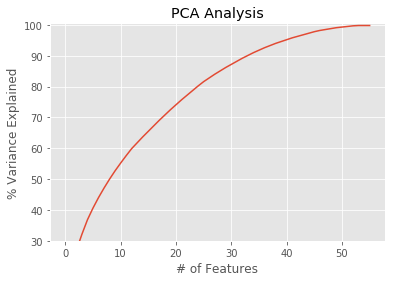

In [182]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

#### Based on the plot above it's clear we should pick 50 or more features.

## Dummy encoding
#### Convert category feature into numerical

In [121]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133587 entries, 0 to 133842
Columns: 1943 entries, loan_amnt to issue_date_Mar-16
dtypes: bool(1), float64(54), int64(1), uint8(1887)
memory usage: 302.6 MB


In [ ]:
df.shape

## Modeling

## Model 1: Build Logistic Regression Model

In [123]:
X = df.loc[:, df.columns != 'Default_Binary'].values
y = df['Default_Binary'].values

In [124]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression model using sklearn

In [125]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

### Calculate the metric scores for the model

In [126]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [127]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


              train      test
metrics                      
AUC        0.915313  0.918612
Accuracy   0.887984  0.889962
Precision  0.928763  0.912234
Recall     0.104326  0.105538
f1-score   0.187581  0.189189


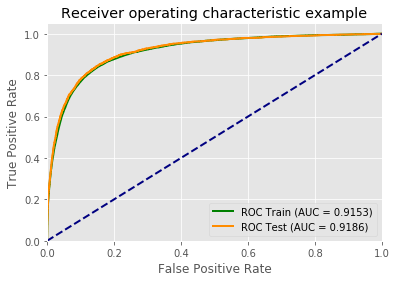

In [129]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [130]:
selected_features = df.columns
selected_features

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec',
       ...
       'application_type_Joint App', 'hardship_flag_N', 'hardship_flag_Y',
       'disbursement_method_Cash', 'disbursement_method_DirectPay',
       'debt_settlement_flag_N', 'debt_settlement_flag_Y', 'issue_date_Feb-16',
       'issue_date_Jan-16', 'issue_date_Mar-16'],
      dtype='object', length=1943)

### Understanding the Estimated Coefficients

In [131]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
5,fico_range_low,2.845718e-03
24,il_util,4.884380e-04
51,pct_tl_nvr_dlq,4.340316e-04
28,all_util,3.692056e-04
37,mo_sin_old_il_acct,3.459339e-04
38,mo_sin_old_rev_tl_op,3.058092e-04
34,bc_util,2.830981e-04
1,int_rate,1.909541e-04
3,dti,1.896206e-04
7,mths_since_last_delinq,1.348472e-04


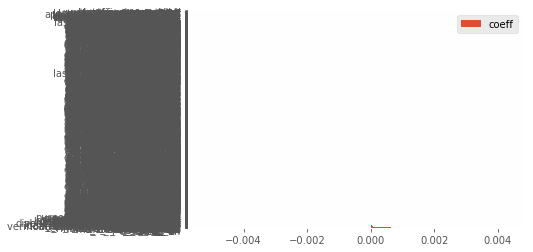

In [349]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

## Bagging

In [351]:
#### Single Tree

              train      test
metrics                      
AUC        1.000000  0.999692
Accuracy   0.999916  0.999925
Precision  1.000000  1.000000
Recall     0.999321  0.999385
f1-score   0.999660  0.999692


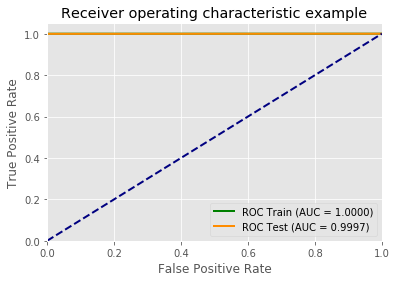

In [132]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [133]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

## Bagged Trees Modeling

              train      test
metrics                      
AUC        1.000000  0.999689
Accuracy   0.999916  0.999925
Precision  1.000000  1.000000
Recall     0.999321  0.999385
f1-score   0.999660  0.999692


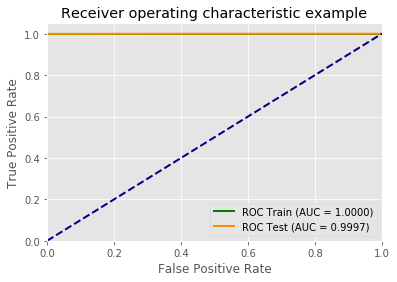

In [134]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 50,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## KNN modeling

              train      test
metrics                      
AUC        0.911510  0.530474
Accuracy   0.895545  0.846620
Precision  0.705442  0.149587
Recall     0.270099  0.055692
f1-score   0.390633  0.081166


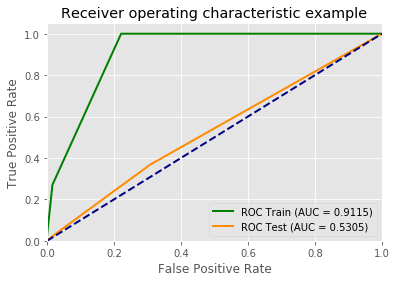

In [355]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## Bagged KNN
#### The bagged KNN algorithm is applied to both training and test set, and it is found that its performance is much better than single KNN, but worse than tree algorithms. 

              train      test
metrics                      
AUC        1.000000  0.999690
Accuracy   0.999916  0.999925
Precision  1.000000  1.000000
Recall     0.999321  0.999385
f1-score   0.999660  0.999692


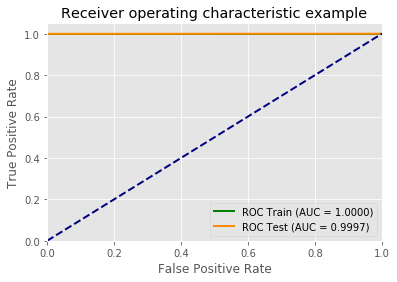

In [135]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 30,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## Random Forest

              train      test
metrics                      
AUC        0.999827  0.999812
Accuracy   0.981613  0.981398
Precision  0.999911  1.000000
Recall     0.851740  0.847077
f1-score   0.919897  0.917208


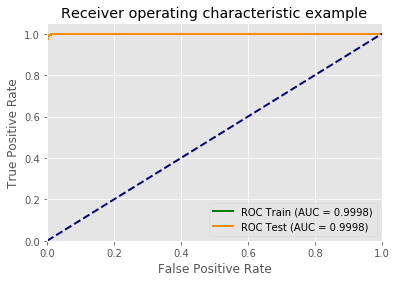

In [137]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Gradient Boosting Trees

           train  test
metrics               
AUC          1.0   1.0
Accuracy     1.0   1.0
Precision    1.0   1.0
Recall       1.0   1.0
f1-score     1.0   1.0


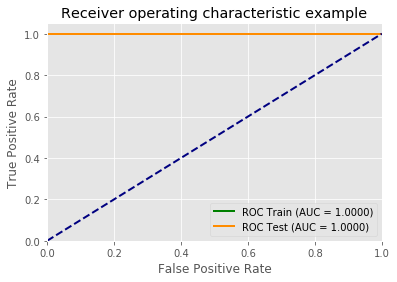

In [138]:
# Gradient Boosting trees with parameter set 1
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

           train  test
metrics               
AUC          1.0   1.0
Accuracy     1.0   1.0
Precision    1.0   1.0
Recall       1.0   1.0
f1-score     1.0   1.0


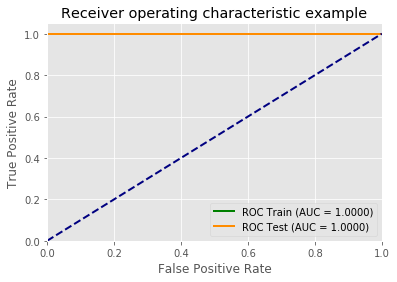

In [140]:
# Gradient Boosting trees with parameter set 2
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
# parameters = {
#    'n_estimators': 50,
#    'max_depth': 5,
#    'learning_rate': 0.2,
#    'random_state': 42
# }

parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'subsample': 0.7,
    'max_features':0.8,
    'random_state': 42
}

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## Neural Network

              train      test
metrics                      
AUC        0.500134  0.500107
Accuracy   0.876045  0.878359
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


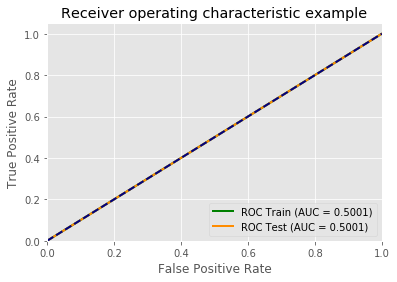

In [141]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(5,5), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### SVM

#### Linear SVM

              train      test
metrics                      
AUC        0.740888  0.743747
Accuracy   0.914138  0.916087
Precision  0.715283  0.714834
Recall     0.510531  0.516000
f1-score   0.595807  0.599357


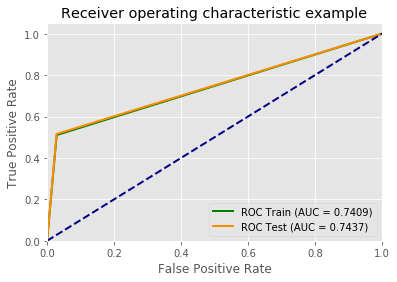

In [142]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### NonLinear SVM
computing time is very long, and have to abort it.

In [143]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':2000
    }
clf = SVC(**parameters)    

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

KeyboardInterrupt: 

## HyperParameter Tuning: Grid Search

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

KeyboardInterrupt: 